# Nombre: Arturo Lazcano
## RUT: 20.470.051-6

# CC3001 Otoño 2020 Tarea 6: Comparación de métodos de hashing


Profesores: Sección 1 Benjamin Bustos, Seccion 2 Jérémy Barbay, Sección 3 Patricio Poblete y Nelson Baloian


## Temas abordados

1. [ ] Hashing Abierto
1. [ ] Búsqueda binaria


## Objetivos de aprendizaje


Despues de realizar esta tarea, el alumno debería
1. [ ] tener un mejor entendimiento de cómo funciona la técnica de Hashing  en sus modalidad de encadenamiento para resolver colisiones  y cómo se comporta empíricamente;


## Entrega

Entrega: Para que su tarea sea evaluada, ustedes deben entregar una copia de este Python Notebook completado con texto (explicaciones de su trabajo), el código de sus funciones y de sus pruebas (al menos 10 por cada función).


---

# Instrucciones

## Lo pedido

En esta tarea Usted debe implementar y comparar la eficiencia de Hashing con encadenamiento (listas enlazadas), versus búsqueda binaria. Para eso se le pide primero que complete la clase Hashing, que implementa una tabla de hashing que resuelve las colisiones con encadenamiento (puede además definir otras clases auxiliares):

In [138]:
import random, sympy, numpy
# Clase nodo para la creaci+on de listas enlazadas
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte
# Creación de clase para listas enlazadas con las funciones necesarias
class Lista:
    def __init__(self):
        self.primero=None
        
    def insertar_al_inicio(self,info):
        self.primero=Nodo(info,self.primero)
        
    # función que recorre una Lista enlazada y busca (si es que está) el valor x 
    # y retorna las comparaciones hechas en la busqueda (c=comparaciones, c=0 al inicio)    
    def recorrer(self,x,c):
        aux=None
        c+=1 #comparación cuando Nodo.info==x
        primero=self.primero
        while primero.info!=x:
            c+=1
            primero=primero.sgte
            if type(primero)==type(aux):
                break
        return c
        
class Hashing:
    def __init__ (self,m):
     # Inicializacion de tabla de tamaño m 
        self.m = m  # tamaño de la tabla
        self.p = sympy.randprime(100000,1000000) #Genera un numero primo al azar dentro del rango especificado
        self.a = random.randint(1,self.p) # genera un numero entero al azar dentro del rango especificado
        self.tabla=numpy.full(m, None, dtype=object) #Crea un arreglo que puede contener objetos (punteros a ellos)

    def h(self,x): 
    # retorna el valor hashing para x = ((a*x)mod PRIME)mod m
        return  ((self.a*x)%self.p)%self.m
    
    def insertar(self,x):
    # inserta un elemento en la tabla
        if self.tabla[self.h(x)]==None: #caso cuando en el "casillero" es None, agrega el número
            self.tabla[self.h(x)]=x
        elif type(self.tabla[self.h(x)])==Lista: #caso cuando el "casillero" ya es una lista enlazada,
            self.tabla[self.h(x)].insertar_al_inicio(x) # agrega el elemento a la lista
        elif type(self.tabla[self.h(x)])==int: #caso cuando en el "casillero" hay solo un número
            self.tabla[self.h(x)]=Lista()
            self.tabla[self.h(x)].insertar_al_inicio(self.tabla[self.h(x)])
            self.tabla[self.h(x)].insertar_al_inicio(x) #crea una lista enlazada con el número anterior
                                                        #y el nuevo
    
    def buscar(self,x):
    # retorna el numero de COMPARACIONES que hizo para determinar si  
    # x estaba o no en la tabla 
        if self.tabla[self.h(x)]==None: #si el casillero es None, el numero no está (1 comparacion)
            return 1
        elif type(self.tabla[self.h(x)])==int and self.tabla[self.h(x)]==x:
            return 1 #retorna 1 si en el casillero está el valor x
        elif type(self.tabla[self.h(x)])==Lista: # si hay una lista enlazada, recorrerla y ver si está x
            return self.tabla[self.h(x)].recorrer(x,0)

# a continuacion se prueba el funcionamiento de la funcion de Hashing dada
c = Hashing(10000)
for i in range(50):
    print(c.h(random.randint(1,10000)))

6649
6740
9660
4642
1870
3411
7299
3484
3032
6996
2037
493
2097
3950
3272
6668
7121
3202
4509
5912
2944
4396
7683
9090
960
9157
3304
3463
1019
6908
6990
3488
3585
9309
417
5589
7254
8079
64
5899
3446
9837
4127
1916
8551
478
692
8260
999
1711


Ademas debe modificar la búsqueda binaria (VERSION OPTIMIZADA, descrita en el Capítulo 4 Sección "Una manera más eficiente de programar la búsqueda binaria") para que devuelva el número de comparaciones realizadas durante la búsqueda.

In [139]:
# Búsqueda binaria, versión iterativa y con <=
# busca x en el arreglo a y retorna las comparaciones hechas
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    comparaciones=0
    while i<j: # conjunto tiene al menos 2 elementos
        k=(i+j)//2
        if x<=a[k]:
            j=k    # x estaría en a[i],...,a[k]
            comparaciones+=1
        else:
            i=k+1  # x estaría en a[k+1],...,a[j]
            comparaciones+=1
    # al terminar, el conjunto factible se ha reducido a 0 o 1 elemento
    # por lo tanto sumamos la última comparación (si está o no el número)
    comparaciones+=1 
    return comparaciones

Luego escriba el codigo necesario para realizar los siguientes experimentos y mostrar los resultados en graficos usando *%pylab inline*, como se ha visto en ejemplos en los apuntes del curso: 

1.   Crear un conjunto de $n=100.000$ numeros enteros únicos (sin repeticion) entre $0$ y $100.000.000$ y ponerlos en un arreglo ordenado y en una tabla de hashing de tamaño $m=10.000$. Para ordenar el arreglo puede usar el método *sort()*.
2.   Generar $t=1.000$ números entre $0$ y $100.000.000$ y registrar el número de comparaciones promedio que se obtiene al buscarlos en el arreglo con busqueda binaria ($c1$) y con la tabla de hashing ($c2$).
3.   Repetir el experimento anterior para $n$ variable (a lo menos $10$ veces), de modo de encontrar el factor de carga para el cual el los resultados de la busqueda binaria y la busqueda con hashing encadenado en una tabla de tamaño $10.000$ sean iguales. Recuerde que el factor de carga se define como $n/m$, con $n=$ numero de elementos en la tabla, y $m=$ tamaño de la tabla (queda fijo $m =$ 10.000 para esta tarea).
4.   Para mostrar gráficamente ese punto, con los resultados de los experimentos pedidos en el punto anterior confeccione un grafico con curvas uniendo los puntos $n$ vs. $c1$ y $n$ vs. $c2$.

Recuerde que para graficar curvas en esta plataforma puede hacer lo siguiente:

In [140]:
%pylab inline
import random
#creación de array c1 y ordenación
c1=random.sample(range(100000001), 100000)
c1.sort()
#creacion de Hashing de tamaño 10000
c2=Hashing(10000)
for i in range(100000):
    c2.insertar(c2.h(random.randint(1,100000000)))
#creación del array t     
t=[]
for i in range(0,1000):
    numero=randint(0,100000000)
    t.append(numero)
#función que retorna el promedio de comparaciones hechas de busquedas de un número de t, en c1 y c2
def promedio_comparaciones(t,c1,c2):
    listaCompc1=[] # lista de comparaciones de c1
    listaCompc2=[] # lista de comparaciones de c2
    for i in t:
        listaCompc1.append(bbin(i,c1))
        listaCompc2.append(c2.buscar(i)) 
    def promedio(l): #funcion que calcula el promedio, sin contar los casilleros None
        suma=0
        divisor=0
        for i in l:
            if i is not None:
                suma+=i
                divisor+=1
        return suma/divisor
    pc1=promedio(listaCompc1)
    pc2=promedio(listaCompc2)
    return (pc1,pc2)

print("número de comparaciones (c1,c2):")
promedio_comparaciones(t,c1,c2)

Populating the interactive namespace from numpy and matplotlib
número de comparaciones (c1,c2):


(17.682, 11.168)

# 10 repeticiones del experimento variando n (t constante)

In [141]:
%pylab inline
import random
#arreglos auxiliares para graficar
c11=[]
c22=[]

# n=50.000
c1=random.sample(range(100000001), 50000)
c1.sort()
c2=Hashing(10000)
for i in range(50000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=50.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=25.000
c1=random.sample(range(100000001), 25000)
c1.sort()
c2=Hashing(10000)
for i in range(25000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=25.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=10.000
c1=random.sample(range(100000001), 10000)
c1.sort()
c2=Hashing(10000)
for i in range(10000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=10.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=120.000
c1=random.sample(range(100000001), 120000)
c1.sort()
c2=Hashing(10000)
for i in range(120000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=120.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=150.000
c1=random.sample(range(100000001), 150000)
c1.sort()
c2=Hashing(10000)
for i in range(150000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=150.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=500.000
c1=random.sample(range(100000001), 500000)
c1.sort()
c2=Hashing(10000)
for i in range(500000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=500.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=350.000
c1=random.sample(range(100000001), 350000)
c1.sort()
c2=Hashing(10000)
for i in range(350000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=350.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=250.000
c1=random.sample(range(100000001), 250000)
c1.sort()
c2=Hashing(10000)
for i in range(250000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=250.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=200.000
c1=random.sample(range(100000001), 200000)
c1.sort()
c2=Hashing(10000)
for i in range(200000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=200.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

# n=175.000
c1=random.sample(range(100000001), 175000)
c1.sort()
c2=Hashing(10000)
for i in range(175000):
    c2.insertar(c2.h(random.randint(1,100000000)))
print("n=175.000 y comparaciones (c1,c2):")
c11.append(promedio_comparaciones(t,c1,c2)[0])
c22.append(promedio_comparaciones(t,c1,c2)[1])
print(promedio_comparaciones(t,c1,c2))

Populating the interactive namespace from numpy and matplotlib
n=50.000 y comparaciones (c1,c2):
(16.688, 6.204123711340206)
n=25.000 y comparaciones (c1,c2):
(15.681, 3.7982885085574574)
n=10.000 y comparaciones (c1,c2):
(14.367, 1.900990099009901)
n=120.000 y comparaciones (c1,c2):
(17.901, 13.737)
n=150.000 y comparaciones (c1,c2):
(18.261, 16.176)
n=500.000 y comparaciones (c1,c2):
(19.95, 51.504)
n=350.000 y comparaciones (c1,c2):
(19.496, 35.165)
n=250.000 y comparaciones (c1,c2):
(18.956, 25.698)
n=200.000 y comparaciones (c1,c2):
(18.703, 20.757)
n=175.000 y comparaciones (c1,c2):
(18.52, 18.63)


Text(0, 0.5, 'Comparaciones')

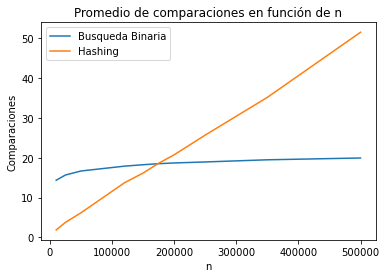

In [142]:
# Grafico
n = [50000, 25000, 10000, 120000, 150000, 500000, 350000, 250000, 200000, 175000]
n.sort()
c11.sort()
c22.sort()
plt.plot(n,c11,label='Busqueda Binaria')
plt.plot(n,c22,label='Hashing')
plt.legend(loc="upper left")
plt.title('Promedio de comparaciones en función de n')
plt.xlabel('n')
plt.ylabel('Comparaciones')

# Conclusión:  
A través de los experimentos hechos, podemos ver como Hashing es mas eficiente que una busqueda binaria para n relativamente pequeños (tamaño<175.000) y, por el contrario, la busqueda binaria es mucho mas eficiente que el método Hashing para n grandes, y esta eficiencia se nota bastante mientras n se hace más grande.  
Por último, dado los 10 experimentos sobre cambiar n, se observa que el factor n/m tal que la cantidad de comparaciones c1 y c2 son relativamente iguales es de 17,5 y es cuando n=175.000 (recordando que m es fijo y m=10.000)